<a href="https://colab.research.google.com/github/ychengbf/ECON441B/blob/main/LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [75]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [76]:
import zipfile
zf = zipfile.ZipFile("/content/gdrive/MyDrive/ECON441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

Exception ignored in: <function ZipFile.__del__ at 0x7f262706a700>
Traceback (most recent call last):
  File "/usr/lib/python3.8/zipfile.py", line 1821, in __del__
  File "/usr/lib/python3.8/zipfile.py", line 1843, in close
  File "/usr/lib/python3.8/zipfile.py", line 1953, in _fpclose
OSError: [Errno 107] Transport endpoint is not connected
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)

In [78]:
# Because the file is too large and the ram exploded everytime, I just draw a fraction of sample from the dataset.
df_sample = df.sample(frac=0.2)
df_sample

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
77122,NaN,NaN,NaN,NaN,ONLINE,A-13102-55378,NaN,NaN,Certified-Expired,F-1,...,NaN,NaN,NaN,Health Care,NaN,NaN,NaN,100381.0,NaN,Year
367888,NaN,Gaithersburg,Law Office of Aparna Dave,MD,NaN,NaN,A-16265-54759,2016-09-29,Certified,H-1B,...,NaN,NaN,N,NaN,"114,500.00",NaN,Year,NaN,NaN,NaN
281059,NaN,Greenville,Nelson Mullins Riley & Scarborough LLP,SC,NaN,NaN,A-15278-25170,2015-10-09,Certified-Expired,H-1B,...,NaN,NaN,N,NaN,187199.0,200004.0,Year,NaN,NaN,NaN
288027,NaN,Santa Clara,"Fragomen, Del Rey, Bernsen & Loewy LLP",CA,NaN,NaN,A-15175-90609,2015-07-01,Certified,H-1B,...,NaN,A,N,NaN,109242.0,130000.0,Year,NaN,NaN,NaN
170874,NaN,Edison,"Pasricha & Patel, LLC",NEW JERSEY,NaN,NaN,A-14134-69142,2014-05-19,Certified-Expired,H-1B,...,NaN,NaN,N,NaN,"105,498.00",NaN,Year,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215562,NaN,Torrance,Law Offices of Jim Kahng,CALIFORNIA,NaN,NaN,A-13129-62768,2013-05-10,Certified-Expired,F-1,...,2013-01-25,NaN,N,NaN,"64,438.00",NaN,Year,NaN,NaN,NaN
121516,NaN,NaN,NaN,NaN,ONLINE,A-13296-04755,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Health Care,NaN,NaN,NaN,180000.0,NaN,Year
371695,NaN,Phoenix,"Jackson Lewis, PC",AZ,NaN,NaN,A-16260-53479,2016-10-13,Certified,H-1B,...,NaN,NaN,N,NaN,"200,000.00",NaN,Year,NaN,NaN,NaN
275507,NaN,Austin,"Ogletree, Deakins, Nash, Smoak & Stewart, P.C.",TX,NaN,NaN,A-15197-98947,2015-10-16,Certified-Expired,H-1B,...,NaN,NaN,N,NaN,109762.0,122850.0,Year,NaN,NaN,NaN


#Choose 4 features you think are important. Case_status is your target variable

In [79]:
#df_select = df[["case_status", "class_of_admission", "wage_offer_from_9089", "us_economic_sector"]]
df_select = df_sample[["employer_state", "class_of_admission",'us_economic_sector','job_info_work_state']]
df_select.head()

,employer_state,class_of_admission,us_economic_sector,job_info_work_state
77122,TEXAS,F-1,Health Care,TEXAS
367888,MD,H-1B,NaN,MD
281059,SC,H-1B,NaN,SC
288027,CA,H-1B,NaN,TX
170874,NEW JERSEY,H-1B,NaN,NEW JERSEY


#Clean your data for a decision tree

In [80]:
#X = pd.get_dummies(df_select, "class_of_admission")
X = pd.get_dummies(df_select, columns=["class_of_admission", "employer_state", 'us_economic_sector',"job_info_work_state"])
y = df_sample["case_status"]

#Fit and plot a decision tree of depth X

In [83]:
from sklearn import tree

In [84]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [85]:
classes = clf.classes_
classes

array(['Certified', 'Certified-Expired', 'Denied', 'Withdrawn'],
      dtype=object)

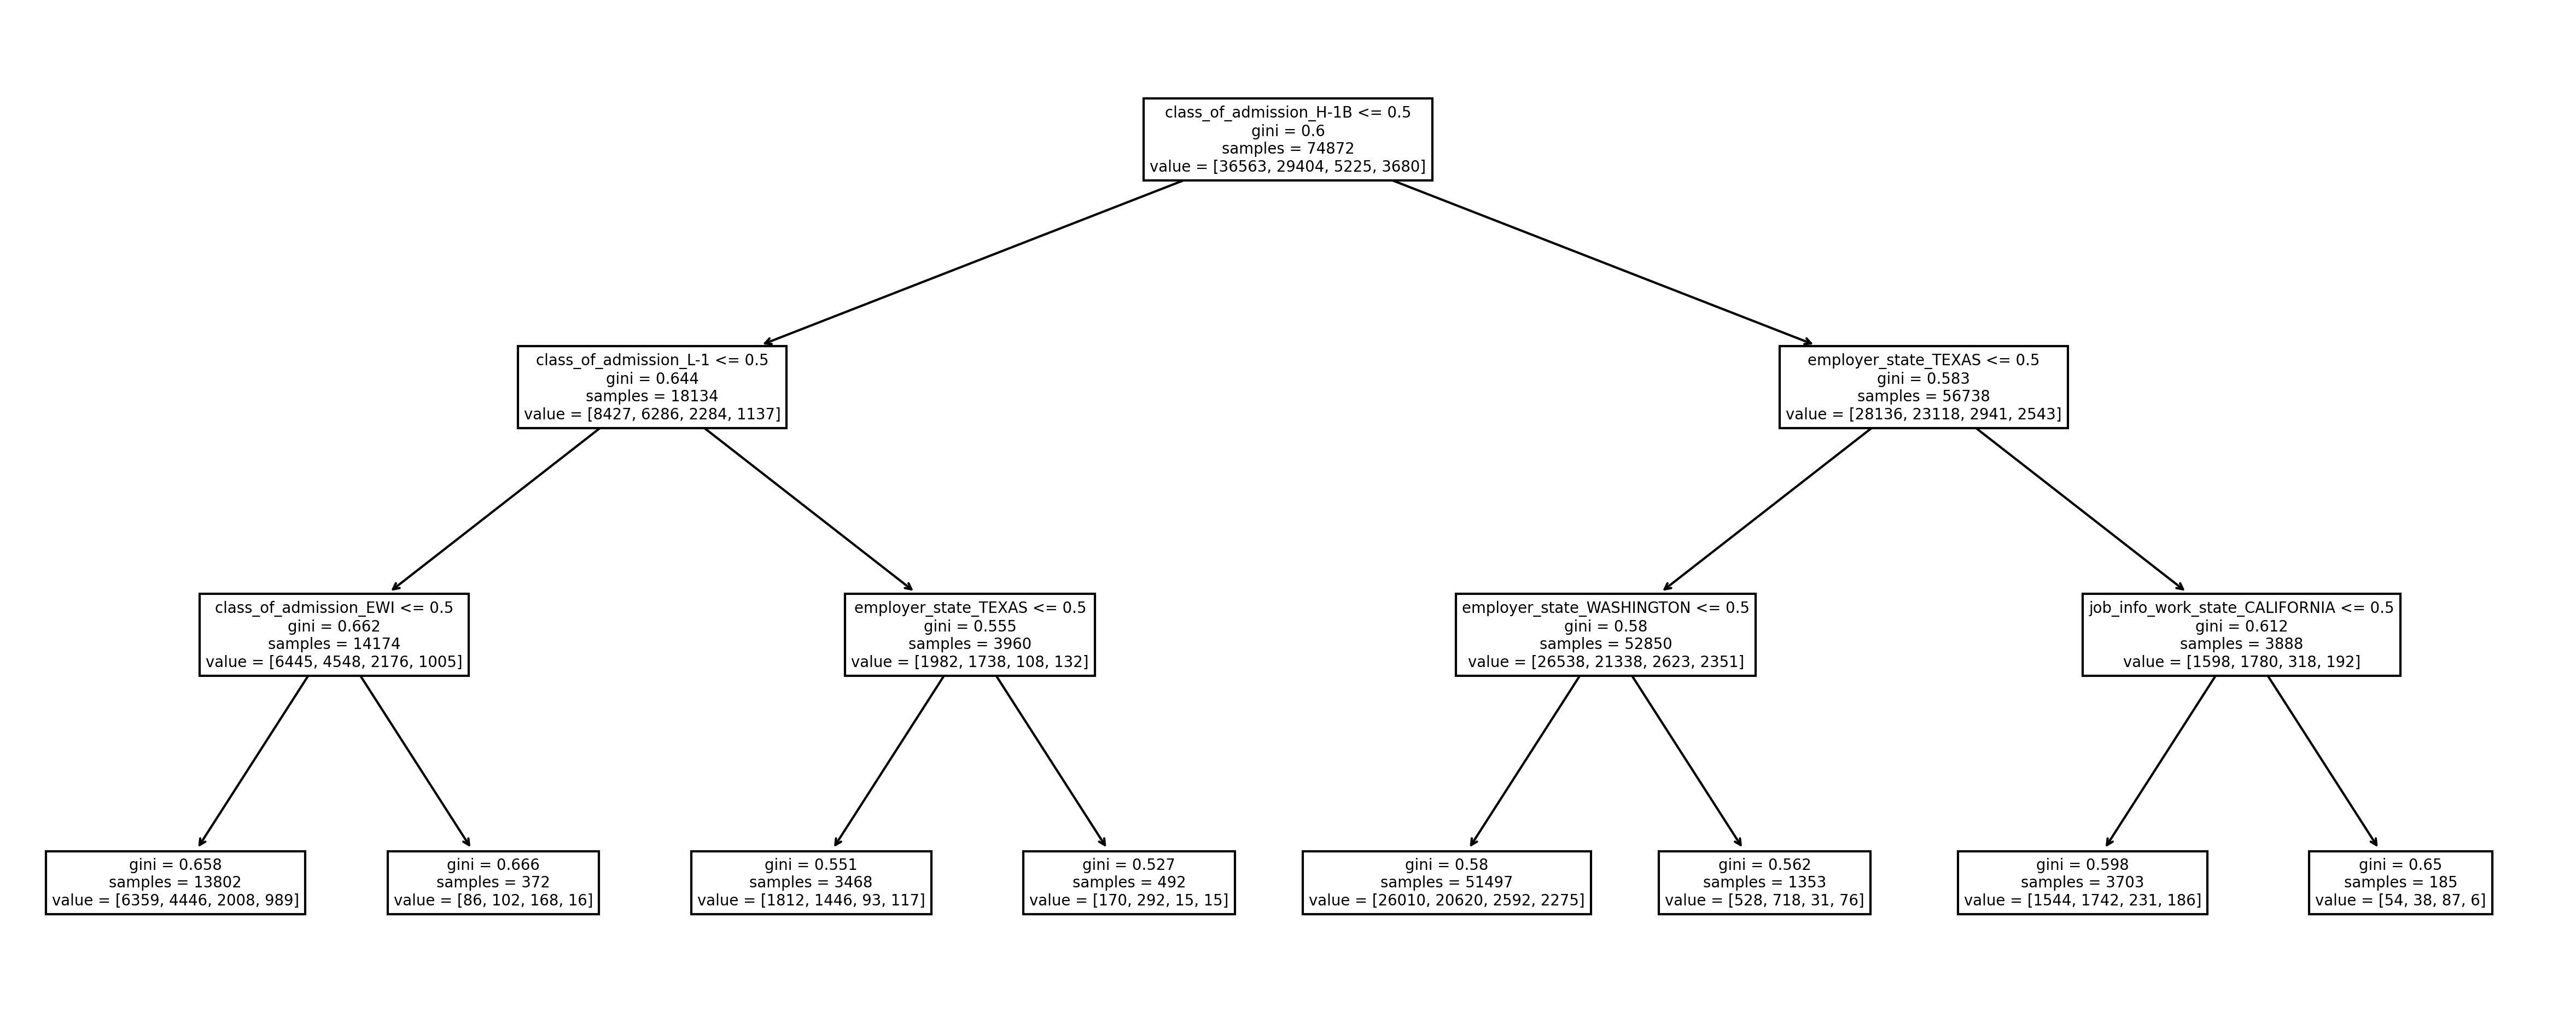

In [86]:
plt.figure(figsize = (20,8),dpi=300)
tree.plot_tree(clf,feature_names = X.columns )
plt.show()

#Write your interpretation of the largest (by sample size) leaf node

In [90]:
# For the leaf node with the largest sample size, we get a value =[26010,20620,2592,2275].
# That means if the applicant is holding a H-1B visa and his employer is from california and his job info work state is at Washington, 
# 26010 samples got certified,20620 got cetified expired, 2592 got denied and 2275 withdrawed.

#Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [93]:
from sklearn.model_selection import train_test_split
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
outputs = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.metrics import accuracy_score

for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)

  y_pred = clf.predict(X_test)
  oos_accuracy = accuracy_score(y_test, y_pred)
  outputs.append(oos_accuracy)

In [94]:
best_depth = max_depths[outputs.index(max(outputs))]
print('the best depth is',best_depth)

the best depth is 17
